# Portfolio Optimization

This post includes code and notes from [python for finance and trading algorithms udemy course](https://udemy.com/python-for-finance-and-trading-algorithms/) and [python for finance and trading algorithms udemy course notebooks](https://github.com/theoneandonlywoj/Python-for-Financial-Analysis-and-Algorithmic-Trading).

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [146]:
df = pd.read_csv('https://stocks-snp-500.herokuapp.com/stocks/index_stocks_table.csv?_size=max')
df.head()

df['Date'] = pd.to_datetime(df.Date)
df.index = pd.to_datetime(df.Date)
df2 = df.drop('Date', axis=1)
df3 = df2.drop('rowid', axis=1)
df3 = df3.drop('Russell_2000_stock', axis=1)
df3 = df3.drop('SP500_stock', axis=1)
df3

stocks = df3

In [149]:
# start = pd.to_datetime('2018-01-01')
# end = pd.to_datetime('today')


In [150]:
# import pandas as pd
# import pandas_datareader.data as web
# import datetime

# MSFT_stock = web.DataReader('MSFT', 'yahoo', start, end)
# MSFT_stock.head()

# ZOOM_stock = web.DataReader('ZM', 'yahoo', start, end)
# ZOOM_stock.head()

# aapl_stock = web.DataReader('aapl', 'yahoo', start, end)
# aapl_stock.head()

# stock_df = pd.concat([df3, aapl_stock['Close'],ZOOM_stock['Close'],MSFT_stock['Close']],axis=1)
# stock_df.columns = ['snp','aapl_stock','ZOOM_stock','MSFT_stock']

# stock_df

In [151]:
# stocks = pd.concat([df3, aapl,cisco,amzn],axis=1)
# stocks.columns = ['snp','aapl','cisco','amzn']

In [152]:
# stock_df

In [153]:
# stocks = stock_df

In [154]:
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret

FXAIX_stock    0.000580
VRTTX_stock    0.000626
FNCMX_stock    0.000963
FSMAX_stock    0.000677
dtype: float64

In [155]:
stocks.pct_change(1).corr()

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
FXAIX_stock,1.000000,0.996178,0.950284,0.926342
VRTTX_stock,0.996178,1.000000,0.950949,0.944306
FNCMX_stock,0.950284,0.950949,1.000000,0.891515
FSMAX_stock,0.926342,0.944306,0.891515,1.000000


# Simulating Thousands of Possible Allocations

In [156]:
stocks.head()

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
Date,,,,
2018-01-02,94.230003,238.889999,91.989998,62.529999
2018-01-03,94.830002,240.289993,92.760002,62.740002
2018-01-04,95.230003,241.199997,92.930000,62.849998
2018-01-05,95.900002,242.750000,93.699997,63.090000
2018-01-08,96.059998,243.199997,93.970001,63.270000


<AxesSubplot:xlabel='Date'>

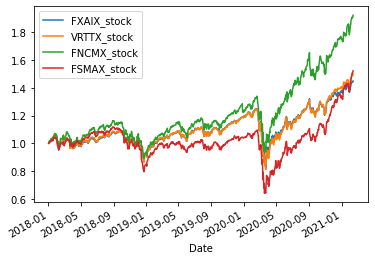

In [157]:
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()

In [158]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.006367,0.005860,0.008371,0.003358
2018-01-04,0.004218,0.003787,0.001833,0.001753
2018-01-05,0.007036,0.006426,0.008286,0.003819
2018-01-08,0.001668,0.001854,0.002882,0.002853


## Log Returns vs Arithmetic Returns

We will now switch over to using log returns instead of arithmetic returns, for many of our use cases they are almost the same,but most technical analyses require detrending/normalizing the time series and using log returns is a nice way to do that.
Log returns are convenient to work with in many of the algorithms we will encounter.

For a full analysis of why we use log returns, check [this great article](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).


In [159]:
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
Date,,,,
2018-01-02,NaN,NaN,NaN,NaN
2018-01-03,0.006347,0.005843,0.008336,0.003353
2018-01-04,0.004209,0.003780,0.001831,0.001752
2018-01-05,0.007011,0.006406,0.008252,0.003811
2018-01-08,0.001667,0.001852,0.002877,0.002849


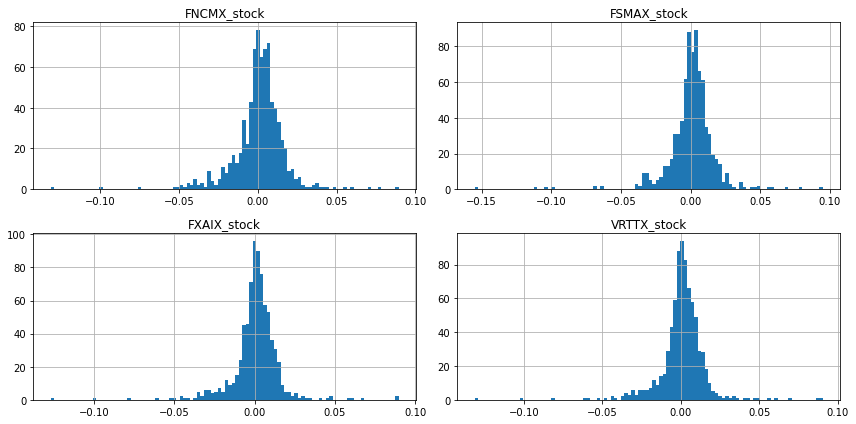

In [160]:
log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

In [161]:
log_ret.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FXAIX_stock,784.0,0.000474,0.014648,-0.127150,-0.003955,0.001085,0.006955,0.089894
VRTTX_stock,784.0,0.000517,0.014807,-0.131282,-0.004037,0.001219,0.007279,0.090501
FNCMX_stock,784.0,0.000835,0.016046,-0.131396,-0.004628,0.001768,0.008337,0.089514
FSMAX_stock,784.0,0.000537,0.016836,-0.154994,-0.004773,0.001653,0.008149,0.095016


In [162]:
log_ret.mean() * 252

FXAIX_stock    0.119352
VRTTX_stock    0.130180
FNCMX_stock    0.210329
FSMAX_stock    0.135276
dtype: float64

In [163]:
# Compute pairwise covariance of columns
log_ret.cov()

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
FXAIX_stock,0.000215,0.000216,0.000223,0.000229
VRTTX_stock,0.000216,0.000219,0.000226,0.000236
FNCMX_stock,0.000223,0.000226,0.000257,0.000241
FSMAX_stock,0.000229,0.000236,0.000241,0.000283


In [164]:
log_ret.cov()*252 # multiply by days

,FXAIX_stock,VRTTX_stock,FNCMX_stock,FSMAX_stock
FXAIX_stock,0.054072,0.054451,0.056310,0.057654
VRTTX_stock,0.054451,0.055251,0.056959,0.059382
FNCMX_stock,0.056310,0.056959,0.064882,0.060762
FSMAX_stock,0.057654,0.059382,0.060762,0.071430


## Single Run for Some Random Allocation

In [165]:
# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

# Create Random Weights
print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')

# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')

# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')

# Sharpe Ratio
SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)


Stocks
Index(['FXAIX_stock', 'VRTTX_stock', 'FNCMX_stock', 'FSMAX_stock'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]


Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]


Expected Portfolio Return
0.12828800153609307


Expected Volatility
0.23642865366590426


Sharpe Ratio
0.5426076727458592


In [166]:
num_ports = 15000

all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for ind in range(num_ports):

    # Create Random Weights
    weights = np.array(np.random.random(4))

    # Rebalance Weights
    weights = weights / np.sum(weights)
    
    # Save Weights
    all_weights[ind,:] = weights

    # Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)

    # Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]

In [167]:
sharpe_arr.max()

0.8049153800614341

In [168]:
sharpe_arr.argmax()

9077

In [169]:
all_weights[1419,:]

array([0.26188068, 0.20759516, 0.00110226, 0.5294219 ])

In [170]:
max_sr_ret = ret_arr[1419]
max_sr_vol = vol_arr[1419]

## Plotting the data

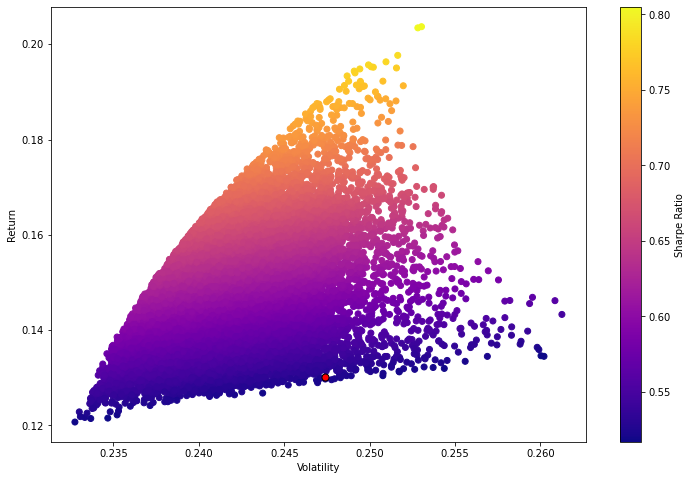

In [171]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')

In [172]:
def get_ret_vol_sr(weights):
    """
    Takes in weights, returns array or return,volatility, sharpe ratio
    """
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    sr = ret/vol
    return np.array([ret,vol,sr])

In [173]:
from scipy.optimize import minimize

To fully understand all the parameters, check out:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

In [1]:
#help(minimize)

Optimization works as a minimization function, since we actually want to maximize the Sharpe Ratio, we will need to turn it negative so we can minimize the negative sharpe (same as maximizing the postive sharpe)

In [175]:
def neg_sharpe(weights):
    return  get_ret_vol_sr(weights)[2] * -1

In [176]:
# Contraints
def check_sum(weights):
    '''
    Returns 0 if sum of weights is 1.0
    '''
    return np.sum(weights) - 1

In [177]:
# By convention of minimize function it should be a function that returns zero for conditions
cons = ({'type':'eq','fun': check_sum})

In [178]:
# 0-1 bounds for each weight
bounds = ((0, 1), (0, 1), (0, 1), (0, 1))

In [179]:
# Initial Guess (equal distribution)
init_guess = [0.25,0.25,0.25,0.25]

In [180]:
# Sequential Least SQuares Programming (SLSQP).
opt_results = minimize(neg_sharpe,init_guess,method='SLSQP',bounds=bounds,constraints=cons)

In [181]:
opt_results

     fun: -0.8257252387825378
     jac: array([ 2.48069711e-01,  2.13815376e-01, -7.45058060e-09,  2.42212258e-01])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([0.00000000e+00, 2.77555756e-16, 1.00000000e+00, 0.00000000e+00])

In [182]:
opt_results.x

array([0.00000000e+00, 2.77555756e-16, 1.00000000e+00, 0.00000000e+00])

In [183]:
get_ret_vol_sr(opt_results.x)

array([0.21032899, 0.25472031, 0.82572524])

# All Optimal Portfolios (Efficient Frontier)

Efficient Frontier http://www.investopedia.com/terms/e/efficientfrontier

In [184]:
# Our returns go from 0 to somewhere along 0.3
# Create a linspace number of points to calculate x on
frontier_y = np.linspace(0,0.3,100) # Change 100 to a lower number for slower computers!

In [185]:
def minimize_volatility(weights):
    return  get_ret_vol_sr(weights)[1] 

In [186]:
frontier_volatility = []

for possible_return in frontier_y:
    # function for return
    cons = ({'type':'eq','fun': check_sum},
            {'type':'eq','fun': lambda w: get_ret_vol_sr(w)[0] - possible_return})
    
    result = minimize(minimize_volatility,init_guess,method='SLSQP',bounds=bounds,constraints=cons)
    
    frontier_volatility.append(result['fun'])

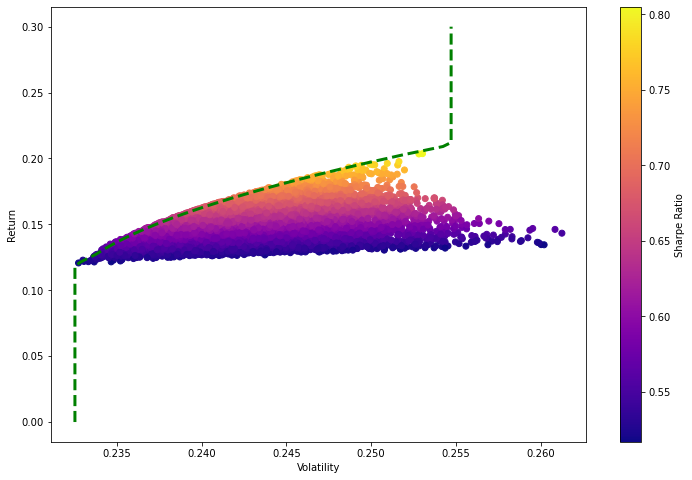

In [187]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')



# Add frontier line
plt.plot(frontier_volatility,frontier_y,'g--',linewidth=3)